Делал в colab, запускать лучше там же. Чтобы работало, файл клал сюда
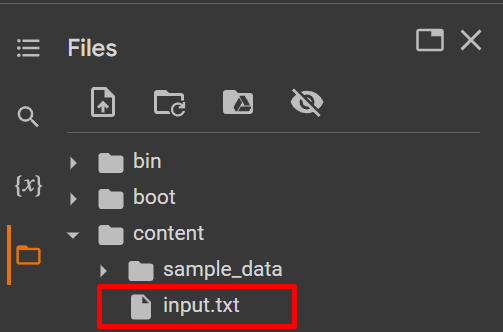

# Задание 9
Опирался на вот эту статью: https://habr.com/ru/articles/517410/

In [ ]:
!pip install nltk

In [ ]:
!pip install pymorphy2

In [ ]:
!pip install -U pymorphy2-dicts-ru

In [121]:
import string
import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import pymorphy2

In [ ]:
nltk.download('punkt')

In [ ]:
nltk.download('stopwords')

## Задание 9. Функция для построения частотного словаря

In [156]:
# построение словаря одной функцией
def make_freq_dict_ru(input_path : str, output_path : str):
    # функция удаляет заданные символы из текста
    def replace_chars_in_text(text, chars, sub_char):
        return sub_char.join([ch for ch in text if ch not in chars])

    # открываю файл и считываю текст
    spec_chars = string.punctuation + '\xa0«»\t—…*'
    f = open(input_path, 'r', encoding='utf-8')
    text = f.read()

    # привожу к нижнему регистру, удаляю пунктуацию и цифры
    text = text.lower()
    text = replace_chars_in_text(text, spec_chars, '')
    text = replace_chars_in_text(text, string.digits, '')

    # токенизирую и удаляю из текста стоп-слова
    text_tokens = word_tokenize(text)
    russian_stopwords = stopwords.words("russian")
    text_tokens = [word for word in text_tokens if not word in russian_stopwords]

    # нормализую слова
    morph = pymorphy2.MorphAnalyzer()

    for i in range(len(text_tokens)):
        text_tokens[i] = morph.parse(text_tokens[i])[0].normal_form

    # формирую словарь
    nltk_text = nltk.Text(text_tokens)
    fdist = FreqDist(nltk_text)

    # формирую файл со словарем
    with open(output_path, 'w', encoding='utf-8') as f:
        for word in fdist:
            f.write(f'{word}: {fdist[word]}\n')

In [157]:
make_freq_dict_ru('input.txt', 'output.txt')

## Задание 9. Построение частотного словаря пошагово и более подробно

In [150]:
spec_chars = string.punctuation + '\xa0«»\t—…*'
input_path = 'input.txt'
output_path = 'output.txt'

In [98]:
f = open(input_path, 'r', encoding='utf-8')
text = f.read()
text = text.lower()
len(text)

1890

In [99]:
def replace_chars_in_text(text, chars, sub_char):
    # функция удаляет заданные символы из текста
    return sub_char.join([ch for ch in text if ch not in chars])

In [100]:
# удаляю пунктуацию
text = replace_chars_in_text(text, spec_chars, '')
len(text)

1819

In [101]:
# удаляю цифры, так как мне кажется, что они только портят данные
text = replace_chars_in_text(text, string.digits, '')
len(text)

1799

In [102]:
text_tokens = word_tokenize(text)
len(text_tokens)

230

In [103]:
text_tokens[:5]

['задание', 'балл', 'написать', 'программу', 'python']

In [104]:
nltk_text = nltk.Text(text_tokens)
print(type(nltk_text))
nltk_text[:5]

<class 'nltk.text.Text'>


['задание', 'балл', 'написать', 'программу', 'python']

In [105]:
fdist = FreqDist(nltk_text)
fdist

FreqDist({'в': 12, 'на': 6, 'текст': 6, 'предложений': 6, 'задание': 5, 'для': 5, 'балл': 4, 'с': 4, 'по': 4, 'и': 4, ...})

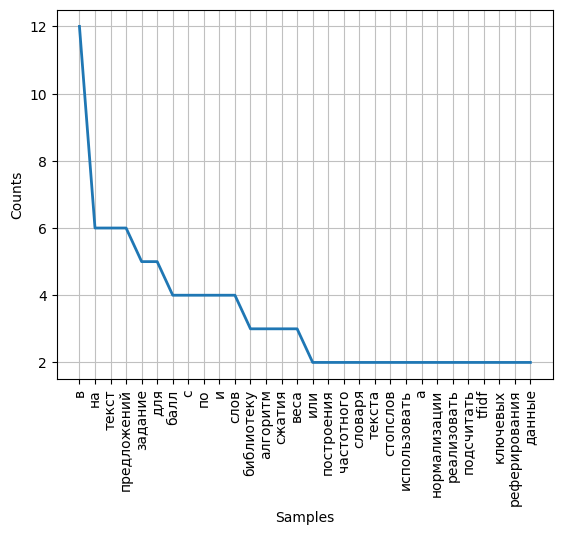

<Axes: xlabel='Samples', ylabel='Counts'>

In [107]:
# график частоты слов
fdist.plot(30,cumulative=False)

In [112]:
russian_stopwords = stopwords.words("russian")
tokens_without_sw = [word for word in text_tokens if not word in russian_stopwords]
len(tokens_without_sw)

181

In [114]:
nltk_text_sw = nltk.Text(tokens_without_sw)
fdist_sw = FreqDist(nltk_text_sw)
fdist_sw

FreqDist({'текст': 6, 'предложений': 6, 'задание': 5, 'балл': 4, 'слов': 4, 'библиотеку': 3, 'алгоритм': 3, 'сжатия': 3, 'веса': 3, 'построения': 2, ...})

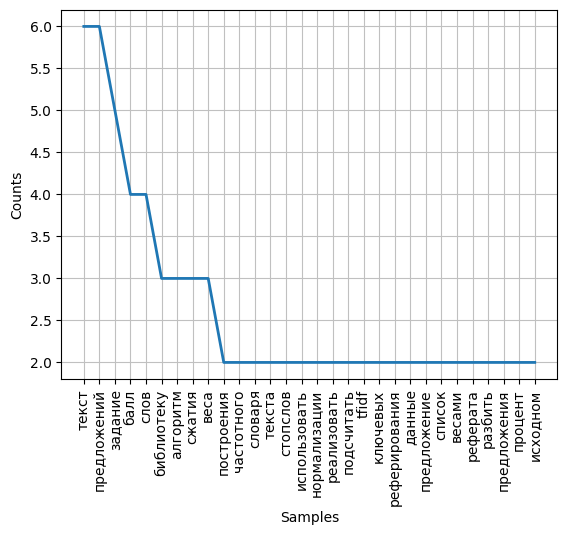

<Axes: xlabel='Samples', ylabel='Counts'>

In [115]:
# график частоты слов
fdist_sw.plot(30,cumulative=False)

In [134]:
morph = pymorphy2.MorphAnalyzer()
tokens_norm = []

for i in range(len(tokens_without_sw)):
    tokens_norm.append(morph.parse(tokens_without_sw[i])[0].normal_form)

In [144]:
print(tokens_without_sw[10:17])
tokens_norm[10:17]

['словаря', 'текста', 'русском', 'языке', 'учета', 'стопслов', 'входной']


['словарь', 'текст', 'русский', 'язык', 'учёт', 'стопслово', 'входной']

In [145]:
nltk_text_norm = nltk.Text(tokens_norm)
fdist_norm = FreqDist(nltk_text_norm)
fdist_norm

FreqDist({'текст': 10, 'предложение': 10, 'задание': 6, 'вес': 6, 'слово': 5, 'балл': 4, 'словарь': 4, 'программа': 3, 'частотный': 3, 'стопслово': 3, ...})

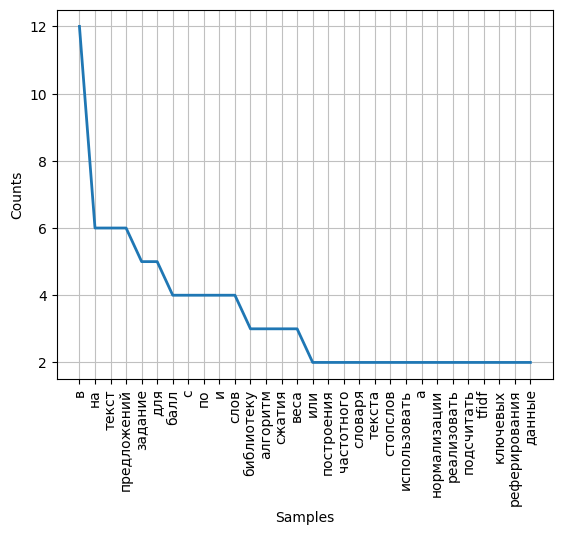

<Axes: xlabel='Samples', ylabel='Counts'>

In [146]:
# график частоты слов
fdist.plot(30,cumulative=False)

In [152]:
with open(output_path, 'w', encoding='utf-8') as f:
    for word in fdist_norm:
        f.write(f'{word}: {fdist_norm[word]}\n')

# Задание 10

In [159]:
from nltk.stem.snowball import SnowballStemmer

In [161]:
# построение словаря одной функцией
def make_freq_dict_ru_stem(input_path : str, output_path : str):
    # функция удаляет заданные символы из текста
    def replace_chars_in_text(text, chars, sub_char):
        return sub_char.join([ch for ch in text if ch not in chars])

    # открываю файл и считываю текст
    spec_chars = string.punctuation + '\xa0«»\t—…*'
    f = open(input_path, 'r', encoding='utf-8')
    text = f.read()

    # привожу к нижнему регистру, удаляю пунктуацию и цифры
    text = text.lower()
    text = replace_chars_in_text(text, spec_chars, '')
    text = replace_chars_in_text(text, string.digits, '')

    # токенизирую и удаляю из текста стоп-слова
    text_tokens = word_tokenize(text)
    russian_stopwords = stopwords.words("russian")
    text_tokens = [word for word in text_tokens if not word in russian_stopwords]

    # нормализую слова
    snowball = SnowballStemmer("russian")

    for i in range(len(text_tokens)):
        text_tokens[i] = snowball.stem(text_tokens[i])

    # формирую словарь
    nltk_text = nltk.Text(text_tokens)
    fdist = FreqDist(nltk_text)

    # формирую файл со словарем
    with open(output_path, 'w', encoding='utf-8') as f:
        for word in fdist:
            f.write(f'{word}: {fdist[word]}\n')

In [162]:
make_freq_dict_ru_stem('input.txt', 'output_stem.txt')

# Задание 11

Опирался на вот эту статью: https://habr.com/ru/companies/otus/articles/755772/

In [166]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [171]:
# Текстовые данные, взяты из статьи: https://habr.com/ru/news/770514/
documents = [
    "В конце октября 2022 года Илон Маск купил соцсеть Twitter, ныне X.",
    "Ряд СМИ вместе с аналитиками попробовали подвести итоги прошедшего года.",
    "27 октября 2022 года Маск официально взял на себя управление компанией.",
    "Он немедленно уволил весь топ-менеджмент Twitter, а в течение следующих недель ещё около 5000 человек, или примерно две трети штата компании, оставшись с относительно небольшой командой в примерно 1500 сотрудников.",
    "Сразу после покупки компании Маск заявил о планах жёсткой борьбы с ботами, а чуть позже — о намерении превратить Twitter в «приложение для всего», включающее в себя платформу цифровых платежей, а также аудио- и видеозвонки.",
    "Он заявил сотрудникам, что, несмотря на массовые сокращения, он видит «ясный, но трудный путь» к будущей оценке компании в более чем $250 млрд.",
    "Тем не менее, как считает большинство аналитиков, за прошедший год платформа пострадала от ряда необдуманных решений и сейчас сталкивается с огромной конкуренцией.",
    "Как отмечает ArsTechnica, после того как Маск сделал компанию частной, она перестала предоставлять подробные отчёты о своём финансовом состоянии и числе пользователей, однако сторонние аналитики, ориентируясь на открытые и слитые данные, считают, что платформа находится в упадке.",
    "Так, в отчёте The Information, опубликованном в начале октября, говорится, что с момента покупки Маском компании «количество ежедневных активных пользователей X упало на 3,7%до 245 миллионов».",
    "Многих пользователей отпугнули спорные шаги, такие как сокращение команд модераторов, взимание платы за верификацию аккаунтов и неожиданный ребрендинг. ",
    "Немного другие данные приводят аналитики из Sensor Tower.",
    "Они утверждают, что число ежедневных активных пользователей X в августе 2023 года снизилось на 9% процентов по сравнению с августом 2022 года.",
    "Падение числа пользователей сопровождается также сокращением времени, проведённого в соцсети (падение составило 13%), что, по мнению Sensor Tower, гораздо более важный показатель. ",
    "Ещё одна исследовательская фирма Similarweb сообщила на прошлой неделе, что за год использование X «снизилось по всем параметрам».",
    "«В сентябре глобальный трафик на twitter.com снизился на 14% по сравнению с аналогичным периодом прошлого года, а трафик на Ads.twitter.com для рекламодателей снизился на 16,5%.",
    "В США, откуда приходится около четверти трафика twitter.com, сентябрьский трафик снизился на 19%.",
    "Тенденция была аналогичной, хотя и не столь выраженной, в других странах: минус 11,6% в Великобритании, минус 13,4% во Франции, минус 17,9% в Германии и минус 17,5% в Австралии»."
]

[(0.362798893488386, 'соцсеть'), (0.362798893488386, 'ныне'), (0.362798893488386, 'купил'), (0.362798893488386, 'конце'), (0.362798893488386, 'илон'), (0.2841453538170319, 'октября'), (0.2841453538170319, '2022'), (0.25882456963448525, 'маск'), (0.23813598256030596, 'года'), (0.23813598256030596, 'twitter'), (0.0, 'ясный'), (0.0, 'штата'), (0.0, 'шаги'), (0.0, 'чуть'), (0.0, 'что'), (0.0, 'число'), (0.0, 'числе'), (0.0, 'числа'), (0.0, 'четверти'), (0.0, 'чем'), (0.0, 'человек'), (0.0, 'частной'), (0.0, 'цифровых'), (0.0, 'хотя'), (0.0, 'франции'), (0.0, 'фирма'), (0.0, 'финансовом'), (0.0, 'утверждают'), (0.0, 'управление'), (0.0, 'упало'), (0.0, 'упадке'), (0.0, 'уволил'), (0.0, 'трудный'), (0.0, 'трети'), (0.0, 'трафика'), (0.0, 'трафик'), (0.0, 'топ'), (0.0, 'того'), (0.0, 'течение'), (0.0, 'тенденция'), (0.0, 'тем'), (0.0, 'такие'), (0.0, 'также'), (0.0, 'так'), (0.0, 'сша'), (0.0, 'считают'), (0.0, 'считает'), (0.0, 'странах'), (0.0, 'сторонние'), (0.0, 'столь'), (0.0, 'сталкивае

In [236]:
def get_tf_idf(documents):
    documents = ' '.join(documents)

    # Создание объекта TfidfVectorizer
    tfidf_vectorizer = TfidfVectorizer()

    # Применение TF-IDF к текстовым данным
    tfidf_matrix = tfidf_vectorizer.fit_transform([documents])

    # Получение списка ключевых слов и их значения TF-IDF для первого документа
    feature_names = tfidf_vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix.toarray()[0]

    # Сортировка слов по значениям TF-IDF
    sorted_keywords = sorted(zip(tfidf_scores, feature_names), reverse=True)

    return sorted_keywords

In [237]:
# одни из ключевых слов "на", "что" и "по". Очевидно, что нужно удалять стоп-слова
sorted_keywords = get_tf_idf(documents)
print(sorted_keywords)

[(0.4187628431947845, 'на'), (0.22841609628806428, 'что'), (0.22841609628806428, 'года'), (0.22841609628806428, 'twitter'), (0.19034674690672024, 'пользователей'), (0.1522773975253762, 'по'), (0.1522773975253762, 'минус'), (0.1522773975253762, 'маск'), (0.1522773975253762, 'компании'), (0.1522773975253762, 'как'), (0.11420804814403214, 'трафик'), (0.11420804814403214, 'снизился'), (0.11420804814403214, 'он'), (0.11420804814403214, 'октября'), (0.11420804814403214, 'за'), (0.11420804814403214, 'com'), (0.11420804814403214, '2022'), (0.0761386987626881, 'также'), (0.0761386987626881, 'сравнению'), (0.0761386987626881, 'снизилось'), (0.0761386987626881, 'себя'), (0.0761386987626881, 'примерно'), (0.0761386987626881, 'после'), (0.0761386987626881, 'покупки'), (0.0761386987626881, 'платформа'), (0.0761386987626881, 'падение'), (0.0761386987626881, 'около'), (0.0761386987626881, 'не'), (0.0761386987626881, 'заявил'), (0.0761386987626881, 'ещё'), (0.0761386987626881, 'ежедневных'), (0.0761386

# Задание 12

In [177]:
import re

In [320]:
# получение реферата одной функцией
def get_summary(input : str, compr_rate : int = 0.1) -> str:
    # Получаю текст из файла, он там не структурирован
    f = open(input, 'r', encoding='utf-8')
    text = f.read()

    # Заменяю переносы строки на пробелы и привожу к нижнему регистру
    text = text.replace('\n', ' ')
    # Разбиваю текст на предложения, получилось почти идеально
    # Только последнее предложение неправильно определилось из-за иницалов
    origin_sentences = re.split("\. |! |\? |… ", text) # оригинальные предложения нужны для вывода
    sentences = re.split("\. |! |\? |… ", text.lower()[:-1])
    # Удаляю лишние пробелы в начале и в конце строки
    sentences = [s.strip() for s in sentences]
    prepared_sentences = []

    for sentence in sentences:
        # удаляю пунктуацию
        sentence = replace_chars_in_text(sentence, spec_chars, '')

        # токенизирую
        text_tokens = word_tokenize(sentence)

        # нормализую слова
        morph = pymorphy2.MorphAnalyzer()

        for i in range(len(text_tokens)):
            text_tokens[i] = morph.parse(text_tokens[i])[0].normal_form

        # удаляю из текста стоп-слова
        russian_stopwords = stopwords.words("russian")
        text_tokens = [word for word in text_tokens if not word in russian_stopwords]

        prepared_sentences.append(' '.join(text_tokens))

    tf_idf_metrics = get_tf_idf(prepared_sentences)
    d_metrics = {}

    for pair in tf_idf_metrics:
        d_metrics[pair[1]] = pair[0]

    # вычисляю весы предложений, предложения идут по порядку
    # первому предложению в исходном тексте соотв первая запись в массиве
    sentences_tf_idf = {}
    i = -1

    for sentence in prepared_sentences:
        val = 0
        i += 1
        words = sentence.split()

        for word in words:
            if word in d_metrics:
                val += d_metrics[word]

        sentences_tf_idf[i] = val

    sentences_tf_idf_sorted = sorted(sentences_tf_idf.items(), key=lambda x:x[1], reverse=True)
    summary_sentence_count = round(len(sentences_tf_idf) * compr_rate)
    sentence_ids = sorted([x[0] for x in sentences_tf_idf_sorted[:summary_sentence_count]])

    summary = ""

    for i in sentence_ids:
        summary += origin_sentences[i] + '. '

    return summary

In [316]:
print(get_summary('input12.txt', 0.1))

Как отмечает ArsTechnica, после того как Маск сделал компанию частной, она перестала предоставлять подробные отчёты о своём финансовом состоянии и числе пользователей, однако сторонние аналитики, ориентируясь на открытые и слитые данные, считают, что платформа находится в упадке. На этой неделе газета Business Insider сообщила, что «подавляющее большинство рекламодателей с крупнейшими расходами в мире приостановили публикацию рекламу на X после приобретения компании Илоном Маском». В отчёте Media Matters for America сообщается, что Visa, один из крупнейших рекламодателей X, потратила на платформе всего $10 за несколько недель, предшествовавших комментариям Яккарино, по сравнению с $77 500 за несколько недель до того, как Маск купил компанию. 


In [318]:
def write_to_file(output, result):
    # формирую файл со результатом
    with open(output, 'w', encoding='utf-8') as f:
        f.write(result)

In [319]:
write_to_file('output12.txt', get_summary('input12.txt', 0.1))

In [291]:
# Получаю текст из файла, он там не структурирован
input_path12 = 'input12.txt'
f = open(input_path12, 'r', encoding='utf-8')
text = f.read()
text

'В конце октября 2022 года Илон Маск купил соцсеть Twitter, ныне X. Ряд СМИ вместе с аналитиками попробовали подвести итоги прошедшего года.\n27 октября 2022 года Маск официально взял на себя управление компанией. Он немедленно уволил весь топ-менеджмент Twitter, а в течение следующих недель ещё около 5000 человек, или примерно две трети штата компании, оставшись с относительно небольшой командой в примерно 1500 сотрудников. Сразу после покупки компании Маск заявил о планах жёсткой борьбы с ботами, а чуть позже — о намерении превратить Twitter в «приложение для всего», включающее в себя платформу цифровых платежей, а также аудио- и видеозвонки. Он заявил сотрудникам, что, несмотря на массовые сокращения, он видит «ясный, но трудный путь» к будущей оценке компании в более чем $250 млрд.\nТем не менее, как считает большинство аналитиков, за прошедший год платформа пострадала от ряда необдуманных решений и сейчас сталкивается с огромной конкуренцией. Как отмечает ArsTechnica, после того к

In [292]:
# Заменяю переносы строки на пробелы и привожу к нижнему регистру
text = text.replace('\n', ' ')
text

'В конце октября 2022 года Илон Маск купил соцсеть Twitter, ныне X. Ряд СМИ вместе с аналитиками попробовали подвести итоги прошедшего года. 27 октября 2022 года Маск официально взял на себя управление компанией. Он немедленно уволил весь топ-менеджмент Twitter, а в течение следующих недель ещё около 5000 человек, или примерно две трети штата компании, оставшись с относительно небольшой командой в примерно 1500 сотрудников. Сразу после покупки компании Маск заявил о планах жёсткой борьбы с ботами, а чуть позже — о намерении превратить Twitter в «приложение для всего», включающее в себя платформу цифровых платежей, а также аудио- и видеозвонки. Он заявил сотрудникам, что, несмотря на массовые сокращения, он видит «ясный, но трудный путь» к будущей оценке компании в более чем $250 млрд. Тем не менее, как считает большинство аналитиков, за прошедший год платформа пострадала от ряда необдуманных решений и сейчас сталкивается с огромной конкуренцией. Как отмечает ArsTechnica, после того как

In [309]:
# Разбиваю текст на предложения, получилось почти идеально
# Только последнее предложение неправильно определилось из-за иницалов
origin_sentences = re.split("\. |! |\? |… ", text) # оригинальные предложения нужны для вывода
sentences = re.split("\. |! |\? |… ", text.lower()[:-1])
# Удаляю лишние пробелы в начале и в конце строки
sentences = [s.strip() for s in sentences]
sentences

['в конце октября 2022 года илон маск купил соцсеть twitter, ныне x',
 'ряд сми вместе с аналитиками попробовали подвести итоги прошедшего года',
 '27 октября 2022 года маск официально взял на себя управление компанией',
 'он немедленно уволил весь топ-менеджмент twitter, а в течение следующих недель ещё около 5000 человек, или примерно две трети штата компании, оставшись с относительно небольшой командой в примерно 1500 сотрудников',
 'сразу после покупки компании маск заявил о планах жёсткой борьбы с ботами, а чуть позже — о намерении превратить twitter в «приложение для всего», включающее в себя платформу цифровых платежей, а также аудио- и видеозвонки',
 'он заявил сотрудникам, что, несмотря на массовые сокращения, он видит «ясный, но трудный путь» к будущей оценке компании в более чем $250 млрд',
 'тем не менее, как считает большинство аналитиков, за прошедший год платформа пострадала от ряда необдуманных решений и сейчас сталкивается с огромной конкуренцией',
 'как отмечает arste

In [294]:
prepared_sentences = []

for sentence in sentences:
    # удаляю пунктуацию
    sentence = replace_chars_in_text(sentence, spec_chars, '')

    # токенизирую
    text_tokens = word_tokenize(sentence)

     # нормализую слова
    morph = pymorphy2.MorphAnalyzer()

    for i in range(len(text_tokens)):
        text_tokens[i] = morph.parse(text_tokens[i])[0].normal_form

    # удаляю из текста стоп-слова
    russian_stopwords = stopwords.words("russian")
    text_tokens = [word for word in text_tokens if not word in russian_stopwords]

    prepared_sentences.append(' '.join(text_tokens))


In [295]:
prepared_sentences[0]

'конец октябрь 2022 год илона маск купить соцсеть twitter ныне x'

In [296]:
tf_idf_metrics = get_tf_idf(prepared_sentences)
print(tf_idf_metrics)

[(0.31377384796182123, 'маск'), (0.28524895269256473, 'компания'), (0.28524895269256473, 'год'), (0.17114937161553884, 'рекламодатель'), (0.17114937161553884, 'пользователь'), (0.17114937161553884, 'платформа'), (0.17114937161553884, 'крупный'), (0.14262447634628236, 'сокращение'), (0.14262447634628236, 'снизиться'), (0.14262447634628236, 'реклама'), (0.14262447634628236, 'неделя'), (0.14262447634628236, 'аналитик'), (0.14262447634628236, 'twitter'), (0.11409958107702589, 'трафик'), (0.11409958107702589, 'сравнение'), (0.11409958107702589, 'покупка'), (0.11409958107702589, 'минус'), (0.11409958107702589, 'купить'), (0.11409958107702589, 'весь'), (0.11409958107702589, '2022'), (0.08557468580776942, 'число'), (0.08557468580776942, 'соцсеть'), (0.08557468580776942, 'сообщить'), (0.08557468580776942, 'расход'), (0.08557468580776942, 'прошлый'), (0.08557468580776942, 'отчёт'), (0.08557468580776942, 'октябрь'), (0.08557468580776942, 'который'), (0.08557468580776942, 'заявить'), (0.0855746858

In [297]:
d_metrics = {}

for pair in tf_idf_metrics:
    d_metrics[pair[1]] = pair[0]

d_metrics['компания']

0.28524895269256473

In [298]:
# вычисляю весы предложений, предложения идут по порядку
# первому предложению в исходном тексте соотв первая запись в массиве
sentences_tf_idf = {}
i = -1

for sentence in prepared_sentences:
    val = 0
    i += 1
    words = sentence.split()

    for word in words:
        if word in d_metrics:
            val += d_metrics[word]

    sentences_tf_idf[i] = val

In [299]:
sentences_tf_idf

{0: 1.2265704965780284,
 1: 0.6560725911928991,
 2: 1.1980456013087721,
 3: 1.4262447634628244,
 4: 1.682968820886132,
 5: 0.9127966486162074,
 6: 1.0268962296932331,
 7: 2.0252675641172098,
 8: 1.54034434453985,
 9: 0.6845974864621556,
 10: 0.3993485337695906,
 11: 1.54034434453985,
 12: 1.0839460202317461,
 13: 1.0839460202317461,
 14: 1.4262447634628237,
 15: 0.656072591192899,
 16: 0.8842717533469509,
 17: 1.6259190303476194,
 18: 0.9983713344239769,
 19: 1.7114937161553887,
 20: 0.7986970675391812,
 21: 1.2265704965780282,
 22: 1.6829688208861324,
 23: 0.45639832430810356,
 24: 2.339041412079031,
 25: 1.1980456013087724,
 26: 1.483294554001337,
 27: 1.1980456013087721,
 28: 0.17114937161553884,
 29: 0.7131223817314118}

In [300]:
sentences_tf_idf_sorted = sorted(sentences_tf_idf.items(), key=lambda x:x[1], reverse=True)
sentences_tf_idf_sorted

[(24, 2.339041412079031),
 (7, 2.0252675641172098),
 (19, 1.7114937161553887),
 (22, 1.6829688208861324),
 (4, 1.682968820886132),
 (17, 1.6259190303476194),
 (8, 1.54034434453985),
 (11, 1.54034434453985),
 (26, 1.483294554001337),
 (3, 1.4262447634628244),
 (14, 1.4262447634628237),
 (0, 1.2265704965780284),
 (21, 1.2265704965780282),
 (25, 1.1980456013087724),
 (2, 1.1980456013087721),
 (27, 1.1980456013087721),
 (12, 1.0839460202317461),
 (13, 1.0839460202317461),
 (6, 1.0268962296932331),
 (18, 0.9983713344239769),
 (5, 0.9127966486162074),
 (16, 0.8842717533469509),
 (20, 0.7986970675391812),
 (29, 0.7131223817314118),
 (9, 0.6845974864621556),
 (1, 0.6560725911928991),
 (15, 0.656072591192899),
 (23, 0.45639832430810356),
 (10, 0.3993485337695906),
 (28, 0.17114937161553884)]

In [301]:
compr_rate = 0.1
sentence_count = round(len(sentences_tf_idf) * compr_rate)
sentence_count

3

In [312]:
sentence_ids = sorted([x[0] for x in sentences_tf_idf_sorted[:sentence_count]])
sentence_ids

[7, 19, 24]

In [310]:
summary = ""
summary_arr = []

for i in sentence_ids:
    summary += origin_sentences[i] + '. '
    summary_arr.append(origin_sentences[i] + '. ')

summary

'Как отмечает ArsTechnica, после того как Маск сделал компанию частной, она перестала предоставлять подробные отчёты о своём финансовом состоянии и числе пользователей, однако сторонние аналитики, ориентируясь на открытые и слитые данные, считают, что платформа находится в упадке. На этой неделе газета Business Insider сообщила, что «подавляющее большинство рекламодателей с крупнейшими расходами в мире приостановили публикацию рекламу на X после приобретения компании Илоном Маском». В отчёте Media Matters for America сообщается, что Visa, один из крупнейших рекламодателей X, потратила на платформе всего $10 за несколько недель, предшествовавших комментариям Яккарино, по сравнению с $77 500 за несколько недель до того, как Маск купил компанию. '

In [311]:
for s in summary_arr:
    print(s, end='\n\n')

Как отмечает ArsTechnica, после того как Маск сделал компанию частной, она перестала предоставлять подробные отчёты о своём финансовом состоянии и числе пользователей, однако сторонние аналитики, ориентируясь на открытые и слитые данные, считают, что платформа находится в упадке. 

На этой неделе газета Business Insider сообщила, что «подавляющее большинство рекламодателей с крупнейшими расходами в мире приостановили публикацию рекламу на X после приобретения компании Илоном Маском». 

В отчёте Media Matters for America сообщается, что Visa, один из крупнейших рекламодателей X, потратила на платформе всего $10 за несколько недель, предшествовавших комментариям Яккарино, по сравнению с $77 500 за несколько недель до того, как Маск купил компанию. 

